In [ ]:
!pip install matplotlib
!pip install seaborn
%matplotlib inline
!pip install pandas

# La préparation des données



## 1 Les données utilisées


Dans le cadre de ce Notebook, pour chaque jeu de données trop volumineux, nous conservons une version avec un extrait des données dans ce répertoire et un lien vers un autre site avec les données complètes (le code pour récupérer ces fichiers volumineux est présent sous forme de commentaire.


## 2 Les outils pour importer les données
On commence par importer les deux principaux packages que nous utiliserons :

In [2]:
import numpy as np
import pandas as pd

### 2.1 Importer des données structurées

La majorité des méthodes et traitements du data scientist prévoient l’utilisation de données sous deux formes :

- Données observations/variables : une ligne correspond à une observation et une colonne à une variable, qui peut être soit quantitative (numérique) soit qualitative (non numérique).
- Matrices de distance : il peut s’agir de corrélations, de distances euclidiennes, de tableaux de comptage …

Ces deux structures de données sont souvent assez éloignées des données brutes obtenues en amont d’une analyse. Le data scientist va donc devoir réfléchir à la transformation des données.

### 2.2 Le traitement des données externes

L’une des forces de Pandas est l’importation et l’exportation des données. 

Ce package possède un ensemble de fonctions très large pour charger des données en mémoire et les exporter dans divers formats. Nous allons développer de nombreux exemples.

#### Importer un fichier csv

La fonction *read_csv()* de Pandas est une fonction avec un nombre de paramètres impressionnant, nous ne nous concentrons ici que sur quelques-uns qui sont importants.

Dans le cas d’un fichier csv classique, un seul paramètre est nécessaire. Il s’agit du chemin vers le fichier. Votre fichier peut se trouver directement sur votre machine mais aussi en ligne. Dans ce cas, il vous suffit de rentrer une adresse web. 

D’autres paramètres pourront vous être utiles lors du traitement de csv :

- *delimiter* : afin de donner le format des séparateurs entre valeurs dans le fichier. Utile dans le cas d’un csv avec des séparateurs points-virgules,
- *decimal* : afin de spécifier le séparateur décimal. Utile dans le cas d’un csv avec des séparateurs décimaux utilisant une virgule,
- *index_col* : afin de spécifier la position de la colonne servant d’index dans le DataFrame créé (attention les colonnes sont toujours indexées à 0),
- *header* : afin de dire si le titre de la colonne se trouve dans la première ligne. Si ce n’est pas le cas, on peut utiliser le paramètre names afin de fournir une liste avec le nom des colonnes pour le DataFrame,
- *dtypes* : dans le cas de gros jeux de données, il peut être intéressant de fournir une liste de types de colonnes ou un dictionnaire afin d’éviter à Python d’avoir à les deviner (ce qui vous évitera certains warnings),
- de nombreux autres paramètres, notamment sur le traitement des données manquantes, sur la transformation des dates, sur le codage des chaînes de caractères…

On utilise *pd.read_csv()* pour lire un fichier csv

Dans ce cas, on va récupérer les données des logements AirBnB de Paris.

In [3]:
# Import d'un extrait
listing=pd.read_csv("listing_extrait.csv", index_col=0)

# Import du fichier complet
#listing=pd.read_csv("https://www.stat4decision.com/listing.csv.gz", index_col=0)

#### Importer un fichier Excel

Microsoft Excel reste l’un des outils de base pour traiter de la donnée. Dans la plupart des projets de data science, vous serez amené à croiser un fichier Excel, que ce soit pour stocker des données ou pour stocker des références ou des informations
annexes.

Pandas possède des outils pour importer des données en Excel sans avoir à passer
par une transformation en csv (souvent fastidieuse si vous avez des classeurs avec de
nombreuses feuilles).

##### L’approche pd.read_excel() :

Cette approche ressemble à l’importation en csv. Pour récupérer le fichier Excel, il faut connaître le nom ou la position de la feuille qui nous intéresse :

In [4]:
frame_credit=pd.read_excel("credit.xlsx", sheet_name=0)

In [5]:
# on peut ajouter le nom de la feuille
frame_credit=pd.read_excel("credit.xlsx", sheet_name="donnees")
frame_credit.head()

,Type de client,Age du client,Situation familiale,Ancienneté,Domiciliation du salaire,Profession,Moyenne en cours,Moyenne des mouvements,Cumul des débits,Autorisation de découvert,Interdiction de chéquier,continue 1,continue 2
0,bon client,plus de 50 ans,célibataire,anc. plus 12 ans,domicile salaire,employé,de 2 à 5 KF encours,plus de 50KF mouvt,de 40 à 100 débits,découvert interdit,chéquier autorisé,765,700
1,bon client,moins de 23 ans,célibataire,anc. 1 an ou moins,domicile salaire,employé,de 2 à 5 KF encours,moins 10 KF mouvt,moins de 40 débits,découvert interdit,chéquier autorisé,465,465
2,mauvais client,de 23 à 40 ans,veuf,anc. de 6 à 12 ans,domicile salaire,employé,de 2 à 5 KF encours,plus de 50KF mouvt,de 40 à 100 débits,découvert autorisé,chéquier interdit,680,555
3,bon client,de 23 à 40 ans,divorcé,anc. de 1 à 4 ans,domicile salaire,employé,plus de 5 KF encours,de 30 à 50KF mouvt,de 40 à 100 débits,découvert interdit,chéquier autorisé,560,640
4,bon client,moins de 23 ans,célibataire,anc. de 6 à 12 ans,non dimicile salaire,employé,de 2 à 5 KF encours,de 10 à 30KF mouvt,moins de 40 débits,découvert interdit,chéquier autorisé,575,570


#### Importer une table issue d’une base de données SQL

Le langage SQL est un langage central de la science des données. La majorité des
bases de données relationnelles peuvent être requêtées en utilisant le langage SQL.
C’est d’ailleurs aujourd’hui l’un des trois langages les plus utilisés par le data scientist
(après Python et R). SQL va vous permettre d’extraire des tables de données qui
pourront ensuite être chargées en mémoire dans des DataFrames.

Pour passer de la base SQL à Python, il faut donc un connecteur permettant de
se connecter à la base et de faire des requêtes directement dessus. Un package
central de Python est très utile dans ce but : c’est SQLalchemy qui a aujourd’hui
remplacé les nombreux packages spécifiques qui pouvaient exister afin de requêter
des bases de données SQL en fonction du type de base : MySQL, PostgreSQL,
SQLlite… SQLalchemy a l’avantage de fournir une seule approche.

On va utliser :

In [6]:
from sqlalchemy import create_engine

In [7]:
ma_con = create_engine("sqlite:///salaries.sqlite")

In [8]:
# on peut vérifier le nom des tables
ma_con.table_names()

['Salaries']

In [9]:
# on peut charger les données
frame_sql = pd.read_sql_query("SELECT * FROM Salaries", ma_con)

In [10]:
frame_sql.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


Si vous voulez lancer des requêtes SQL depuis Python sans forcément charger les
données dans un DataFrame, on pourra le faire avec :

#### Importer des données depuis le web

Le web est un domaine riche en sources de données, vous avez forcément entendu parler de web scrapping pour récupérer des données sur le web.

Le data scientist peut avoir besoin de récupérer des données sur Internet sans vouloir faire du développement web. Dans cette partie, deux approches seront examinées.

Quelle que soit l’approche, Beautiful-Soup est un package central.

Il va vous permettre de récupérer n’importe quel contenu HTML d’une page web et d’extraire de l’information de ce site web.

Si par exemple, on désire scrapper un site, on va devoir commencer par inspecter le code html lié à ce site. Si on désire récupérer tous les noms de package d’un article sur les packages Python pour la data science, on va devoir identifier la balise liée à ces noms et ensuite on pourra commencer à travailler en Python.

En inspectant le code html, on trouve ce code :

Il semble que la balise de division div de ce que l’on cherche se nomme *x-accordion-
heading*. 

On va donc utiliser Python pour récupérer le contenu de la page :

In [11]:
from requests import get
url = 'https://www.stat4decision.com/fr/packages-python-data-science/'
reponse = get(url)
print(reponse.text[:50])




<!DOCTYPE html>

<html class="no-js" lang="fr-F


L'objet reponse que l’on a créé est un objet requests.models.Response.
On va ensuite extraire de cette page les balises div du type recherché :

In [12]:
# on importe BeautifulSoup
from bs4 import BeautifulSoup
# on crée un objet en utlisant le parser Python
html_soup = BeautifulSoup(reponse.text, 'html.parser')
# on recherche la div qui nous intéresse
noms_packages = html_soup.find_all('div', class_='x-accordion-heading')

Dans noms_packages, on a tout ce qui se trouve dans le titre de chaque division.

Nous allons maintenant extraire de cet élément les noms des packages qui se trouvent au début de chaque titre :

In [13]:
# on fait une boucle sur les éléments de l’objet créé
for div_nom in noms_packages :
    # on affiche avec une majuscule en première lettre les
    # premiers mots avant une virgule
    print(div_nom.text.split(",")[0].capitalize())

Jupyter notebook
Numpy
Scipy
Pandas
Statsmodels
Scikit-learn
Matplotlib
Bokeh
Seaborn
Keras


Nous avons donc récupéré automatiquement les valeurs textuelles qui nous intéressent.

Il ne s’agit pas ici de développer plus de notions liées au langage html mais si vous désirez aller plus loin de ce côté-là il vous faudra quelques bases.

Si votre objectif est de directement charger des tableaux dans des objets DataFrame, les choses se simplifient. Pandas, combiné à Beautiful-Soup, fait une grande partie du travail pour vous.

Imaginons que l’on désire récupérer des données sportives, par exemple de tennis, nous allons utiliser les données de Wikipédia sur le tennis et essayer de stocker les informations sur les tournois du grand chelem

In [14]:
ma_page=pd.read_html("https://fr.wikipedia.org/wiki/Grand_Chelem_de_tennis",
                     header="infer")
#le tableau des records masculins est en 14ème position dans la page
tableaux_records = ma_page[13]
tableaux_records.head()

,Rang,Nom,Pays,Open d'Australie V-F,Roland-Garros V-F,Wimbledon V-F,US Open V-F,Total V-F,Durée (années) V,Durée 2 (années) V+F
0,1,Roger Federer,Suisse,6-1,1-4,8-3,5-2,20-10,2003-2018 (16),2003-2018 (16)
1,2,Rafael Nadal,Espagne,1-4,11-0,2-3,3-1,17-8,2005-2018 (14),2005-2019 (15)
2,3,Novak Djokovic,Serbie,7-0,1-3,4-1,3-5,15-9,2008-2019 (12),2007-2019 (13)
3,4,Pete Sampras,États-Unis,2-1,0-0,7-0,5-3,14-4,1990-2002 (13),1990-2002 (13)
4,5,Roy Emerson,Australie,6-1,2-1,2-0,2-1,12-3,1961-1967 (7),1961-1967 (7)


### 2.3 Charger et transformer des données non structurées

L'une des forces de Python pour le traitement des données est sa capacité à transformer
des données non structurées ou semi-structurées en données structurées. Par
le traitement de quelques exemples, nous allons étudier la manière dont vous pouvez
travailler sur des données que vous n’aviez pas l’habitude de traiter avec d’autres outils.

Deux exemples :

- des images,
- des données textuelles stockées sous forme de JSON,


#### Travailler sur des images

On peut charger directement des images dans différents formats

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
arr_image=plt.imread("python-pour-le-data-scientist-dunod.jpeg")

L'image est chargée dans un array à 3 dimensions et codé en RGB

In [17]:
arr_image.shape

(215, 150, 3)

Si on veut afficher l'image à partir de l'array, on peut utiliser :

array([[227,   4,  33],
       [227,   4,  33],
       [227,   4,  33],
       [227,   4,  33],
       [227,   4,  33],
       [227,   4,  33],
       [227,   4,  33],
       [221,   7,  35],
       [134,   7,  24],
       [  4,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

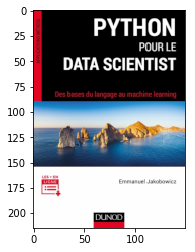

In [18]:
plt.imshow(arr_image)
arr_image[75]

On peut aussi construire des images directement à partir d'arrays. Ainsi on construit une image avec des couleurs générées aléatoirement :

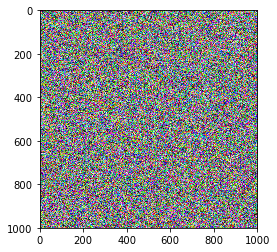

In [19]:
import numpy as np
array_image_rand=np.random.randint(0,255,(1000,1000,3)).astype("uint8")
plt.imshow(array_image_rand)
# on sauvegarde cette figure
plt.savefig("mon_image.jpg")

On génère des entiers entre 0 et 255 et on construit une image de 1000 x 1000 pixels. On va passer cela en type uint8 pour pouvoir l’afficher avec la fonction *imshow* de Matplotlib.

On peut aussi charger toutes les images d'un répertoire :

Nom du fichier : ./python-pour-le-data-scientist-dunod.jpeg


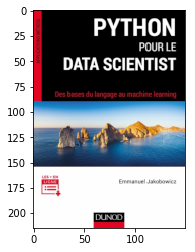

In [20]:
from skimage.io import imread_collection
# votre chemin
image_dir = './*.jpeg'
# on crée une structure rassemblant toutes les images du répertoire
im_dir = imread_collection(image_dir)
print("Nom du fichier :", im_dir.files[0])
# affichage de l’image
plt.imshow(im_dir[0])

#### Travailler sur des fichiers JSON

Un fichier JSON est un fichier très classique de stockage de données semi-structurées.

Vous croiserez fréquemment des jeux de données stockés en JSON mais aussi des pages web utilisant comme format de stockage le JSON (il s’agit du format de stockage des données d’un Jupyter notebook). L’importation d’un JSON est extrêmement
simple avec Pandas, on va utiliser *pd.read_json()* :

fr-en-reussite-au-baccalaureat-age


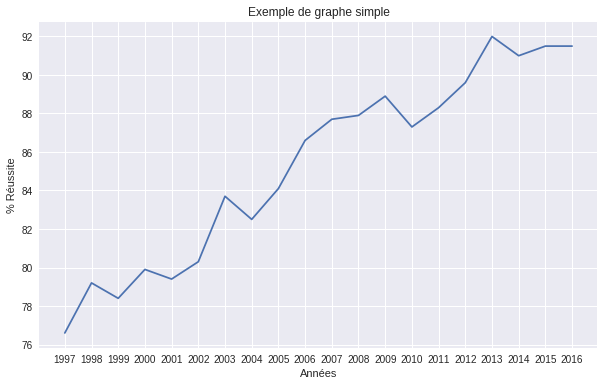

In [21]:
import pandas as pd
import seaborn as sns

df = pd.read_json('https://data.education.gouv.fr/explore/dataset/fr-en-reussite-au-baccalaureat-age/download/?format=json&timezone=Europe/Berlin')
#https://data.education.gouv.fr/explore/dataset/fr-en-reussite-au-baccalaureat-age/table/?sort=-annee

#énumération des colonnes
#print(df.columns)

#accès à la valeur située en (0,0)
print(df.iloc[0,0])

X,Y=[],[]
L=[]
for x in df.itertuples():
    if x.fields['age']=="toutes tranches d'âge" :
        #print(x.fields['annee'],x.fields['pourcentage_d_admis_au_baccalaureat_general'])
        L=L+[(int(x.fields['annee']),float(x.fields['pourcentage_d_admis_au_baccalaureat_general']))]
        

%matplotlib inline
#importation de la librairie
import matplotlib.pyplot as plt

L.sort()
for co in L :
    X,Y = X+[co[0]],Y+[co[1]]
    
plt.figure(figsize=(10,6))
plt.plot(X,Y)
plt.xlabel('Années')
plt.ylabel('% Réussite')
plt.xticks([an for an in range(1997,2017)],[an for an in range(1997,2017)])
plt.title('Exemple de graphe simple')
#plt.grid()
plt.show()
